# **420-514 - Travail Pratique 2**              

## **Informations de l'étudiant :**
### Nom : Bragdon
### Prenom : Cindy
### Numero DA : 9750573
### Session : A24

## **Instructions**

* Faites le travail individuellement.
* La remise du code se fait Léa avant la date limite indiquée dans la boite de remise.
* La présentation du code est évaluée.

## **Contexte**

Vous travaillez pour une entreprise qui s'intéresse à la performance des entreprises dans plusieurs secteurs et veut mieux comprendre la répartition des entreprises, leur croissance, et les tendances globales du marché. Vous utiliserez la base de données MongoDB **`sample_training`**, qui contient plusieurs collections, notamment **`companies`**, **`grades`**, **`inspections`**, et **`zips`**. Ces collections regroupent des informations sur des entreprises, des inspections, des performances académiques et des données géographiques.

L'objectif de ce projet est de récupérer des informations sur une entreprise à partir d'une base de données MongoDB. Le travail se déroule en trois étapes principales :

1. Extraction des données à partir de MongoDB.
2. Transformation des données pour obtenir les informations pertinentes à partir de contrôles dynamiques de sélection.
3. Affichage des résultats sous forme de graphiques et de visualisations.

### **Étape 1 : Extraction des données**
#### **Connexion à la base de donnée MongoDB**

Il faut charger la base de données MongoDB dans un cluster créé avec votre compte _Atlas_. Les informations de connection sont comme les suivantes:

* user : 420-514_A24
* password : Str0ng_P@ssw0rd_420-514
* database : sample_training
* host : 420-514-tp2.g8hmr.mongodb.net
* collections : companies, grades, inspections et zips

Vous devez vous connecter à la base de données, importer et fusionnez les informations des tables dans un Dataframe de pandas.

# 🔍 **Références** <br>
https://spiritual-fight-790.notion.site/Exemples-de-requ-tes-recherche-et-tri-11c45eb1bdf88046bacfffb12628dab8
https://www.mongodb.com/docs/languages/python/pymongo-driver/current/databases-collections/
https://stackoverflow.com/questions/17805304/how-can-i-load-data-from-mongodb-collection-into-pandas-dataframe
https://dataknowsall.com/blog/mongo.html
https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
https://www.interviewqs.com/ddi-code-snippets/import-data-from-mongodb-to-pandas
https://pypi.org/project/tabulate/
https://www.mongodb.com/docs/manual/reference/operator/update/push/
https://stackoverflow.com/questions/55178822/how-to-use-cond-in-mongodb-without-an-else-expression
https://spiritual-fight-790.notion.site/Dates-Visualisation-et-Widgets-interactifs-11545eb1bdf880ecbb4fdcdfd48fe218
https://stackoverflow.com/questions/56935760/how-to-get-dropdown-widget-output-as-a-dataframe
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/?ref=header_outind
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#tagsinput
https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/?ref=header_outind

# 🪛**Installations requises au projet**

In [2]:
!pip install pymongo
!pip install --upgrade pymongo
!pip install tabulate
!pip install matplotlib ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00


# 📩**Imports**

In [3]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from tabulate import tabulate
import os

# 🔌**Connexion de Colabs avec Atlas/Cluster0**

In [4]:

import pymongo
import pandas as pd

# Informations de connexion
user = "cindybragdon"
password = "abc-123"
host = "cluster0.k9lfh.mongodb.net"
database_name = "sample_training"

# URI de connexion avec MongoDB Atlas
uri = f"mongodb+srv://{user}:{password}@{host}/{database_name}?retryWrites=true&w=majority&ssl=true"

# Connexion au cluster MongoDB, déclaration de l'uri dans une variable plus facile d'usage
client = pymongo.MongoClient(uri, tls=True)

# 🚚**Import des informations des collections dans des Dataframes uniques**<br>  📺**Affichage des 5 premières lignes de chacune des collections**

In [5]:

# La variable db représentera la base de données sample_training
db = client[database_name]

# Collections à importer pour le tp
collections = ['companies', 'grades', 'inspections', 'zips']

# Dictionnaire pour stocker les DataFrames dfs par convention
dfs = {}

# Charger chacune des collections de la liste dans un DataFrame en les parcourant toutes
for collection in collections:
    data = list(db[collection].find())

    # Convertion les données en DF pandas
    df = pd.DataFrame(data)

    # Stocker les DF dans le dict
    # Stocker dans un dict permet d'avoir un accès facile et plus rapide au data en donnant la collection comme clé
    # Fusion plus facile parce que scalable. On peut ajouter ou retirer un dict facilement d'un DataFrame
    # On pourra ainsi analyser seulement une collection a la fois
    dfs[collection] = df

# Afficher les 5 premières lignes de chacun des DF

# Récupérer toutes les paires (collection, DataFrame) du dictionnaire dfs
items = dfs.items()
#print(f"items : {items}")

# Parcourir chaque paire dans items
for item in items:
    # Extraire le nom de la collection et le DataFrame de chaque paire
    collection = item[0]
    df = item[1]


    print(f"\n********************************************************************************************************************")
    print(f"**********************************************COLLECTION: {collection}**********************************************")
    print(f"********************************************************************************************************************\n")
    # Affiche les 5 premières lignes d'une collection
    print(df.head())
    # Affiche les 5 premières lignes d'une collection dans un tableau visuel
    print("\n")
    print(tabulate(df.head(), headers='keys', tablefmt='github'))



********************************************************************************************************************
**********************************************COLLECTION: companies**********************************************
********************************************************************************************************************

                        _id         name    permalink  \
0  52cdef7c4bab8bd675297d8a     Wetpaint         abc2   
1  52cdef7c4bab8bd675297d8e     Facebook     facebook   
2  52cdef7c4bab8bd675297d8f    Omnidrive    omnidrive   
3  52cdef7c4bab8bd675297d94      Twitter      twitter   
4  52cdef7c4bab8bd675297d95  StumbleUpon  stumbleupon   

                                  crunchbase_url                homepage_url  \
0     http://www.crunchbase.com/company/wetpaint     http://wetpaint-inc.com   
1     http://www.crunchbase.com/company/facebook         http://facebook.com   
2    http://www.crunchbase.com/company/omnidrive    http://www.omni

# 🐼**Fusion des informations des collections dans un DF de Panda<br> 📺 Affichage d'un échantillonnage du Dataframe.**



In [6]:
# Fusion des informations des tables dans un DF de pandas.
merged_df = pd.concat(dfs.values(), ignore_index=True)

# Afficher le DF fusionné
print("\n*******************************************************************************************************************")
print("**********************************************Afficher les 5 premiers éléments du DF fusionné**********************************************")
print("*******************************************************************************************************************\n")
# Affiche les 5 premiers éléments du DF fusionné
print(merged_df.head(5))
# Affiche les 5 premiers éléments du DF fusionné dans un tableau visuel
print("\n")
print(tabulate(merged_df.head(1), headers='keys', tablefmt='github'))



*******************************************************************************************************************
**********************************************Afficher les 5 premiers éléments du DF fusionné**********************************************
*******************************************************************************************************************

                        _id         name    permalink  \
0  52cdef7c4bab8bd675297d8a     Wetpaint         abc2   
1  52cdef7c4bab8bd675297d8e     Facebook     facebook   
2  52cdef7c4bab8bd675297d8f    Omnidrive    omnidrive   
3  52cdef7c4bab8bd675297d94      Twitter      twitter   
4  52cdef7c4bab8bd675297d95  StumbleUpon  stumbleupon   

                                  crunchbase_url                homepage_url  \
0     http://www.crunchbase.com/company/wetpaint     http://wetpaint-inc.com   
1     http://www.crunchbase.com/company/facebook         http://facebook.com   
2    http://www.crunchbase.com/company/omni


#### Tâche 1.1 : Exploration des données
- Utilisez la collection **`companies`** pour obtenir un aperçu général des données disponibles. Affichez les 10 premiers documents.
  - **MongoDB exemple de requête** :
    ```python
    db.companies.find().limit(10)
    ```
  - Décrivez brièvement la structure des documents (champs et types de données).


# 📺🥇**Affichage les 10 premiers documents de "companies"**

In [7]:
firstTenCompanies = list(db.companies.find().limit(10))
for company in firstTenCompanies:
  print(company)

# Écrire les résultats dans un fichier CSV
df = pd.DataFrame(firstTenCompanies)
csv_filename = 'firstTenCompanies.csv'
df.to_csv(csv_filename, index=False)

# Vérifier si le fichier a bien été créé
if os.path.exists(csv_filename):
    print(f"\nLe fichier '{csv_filename}' a bien été créé.")
else:
    print(f"\nErreur : le fichier '{csv_filename}' n'a pas pu être créé.")

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'), 'name': 'Wetpaint', 'permalink': 'abc2', 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint', 'homepage_url': 'http://wetpaint-inc.com', 'blog_url': 'http://digitalquarters.net/', 'blog_feed_url': 'http://digitalquarters.net/feed/', 'twitter_username': 'BachelrWetpaint', 'category_code': 'web', 'number_of_employees': 47, 'founded_year': 2005, 'founded_month': 10, 'founded_day': 17, 'deadpooled_year': 1, 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system', 'alias_list': '', 'email_address': 'info@wetpaint.com', 'phone_number': '206.859.6300', 'description': 'Technology Platform Company', 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27), 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013', 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for digital publishers. Wet

# 🏠**Structure d'un objet/document 'companies'** <br>
Les document retournées par une requête à une base de données MongoDB sont des document contenant des objets convertis au format JSON.  Pour le cas présent, ils pourraient être retournés dans une structure de données de type dictionnaire Python. Chaque document est organisé en paire clé-valeur.  Ces document peuvent contenir différents type d'objets comme des chaines de caractères, des entiers, des tableaux, des booléans, et peuvent être imbriqués les uns dans les autres. <br>


---

**Exemple d'un objet "companies" :** <br>
{
  "_id": "ObjectId",  *Identifiant unique de la compagnie* (ObjectId dans MongoDB)<br>
  "name": "string",  *Nom de la compagnie*<br>
  "permalink": "string",  *Identifiant unique pour les URLs*<br>
  "crunchbase_url": "string", * URL Crunchbase*<br>
  "homepage_url": "string",  *URL de la page d'accueil/Home*<br>
  "blog_url": "string",  *URL du blog*<br>
  "blog_feed_url": "string", * URL du flux du blog*<br>
  "twitter_username": "string",  *Nom d'utilisateur Twitter*<br>
  "category_code": "string",  *Code de la catégorie*<br>
  "number_of_employees": "int",  *Nombre d'employés*<br>
  "founded_year": "int",  *Année de fondation*<br>
  "founded_month": "int",  *Mois de fondation*<br>
  "founded_day": "int",  *Jour de fondation*<br>
  "deadpooled_year": "int",  *Année de liquidation*<br>
  "tag_list": "string",  *Liste de tags séparés par des virgules*<br>
  "alias_list": "string",  *Liste d'alias (chaîne vide si vide)*<br>
  "email_address": "string",  *Adresse e-mail*<br>
  "phone_number": "string",  *Numéro de téléphone*<br>
  {
  "description": "string",  *Technology Platform Company*<br>
  "created_at": "datetime",  *Date de création : 25 mai 2007 06:51:27*<br>
  "updated_at": "string",  *Dernière mise à jour : Sun Dec 08 07:15:44 UTC 2013*<br>
  "overview": "string",  *Description de la compagnie : <p>Wetpaint is a technology platform company...*</p><br>
  "image": {  // Images disponibles<br>
    "available_sizes": "array"  // Tailles d'image disponibles, tableau d'URL<br>
  },<br>
  "products": [  *Liste de produits*<br>
    {<br>
      "name": "string",  *Nom du produit : Wikison Wetpaint*<br>
      "permalink": "string"  *Permalien du produit*<br>
    }<br>
  ],<br>
  "relationships": [  *Relations dans l'entreprise*<br>
    {<br>
      "is_past": "boolean",  *Statut passé ou actuel*<br>
      "title": "string",  *Titre*<br>
      "person": {  *Détails de la personne*<br>
        "first_name": "string",  *Prénom*<br>
        "last_name": "string",  *Nom*<br>
        "permalink": "string"  *Lien du profil*<br>
      }<br>
    }<br>
  ],<br>
  "competitions": [  *Liste des concurrents*<br>
    {<br>
      "competitor": {<br>
        "name": "string",  *Nom du concurrent*<br>
        "permalink": "string"  *Lien du concurrent*<br>
      }<br>
    }<br>
  ],<br>
  "providerships": "array",  *Liste vide pour les fournisseurs*<br>
  "total_money_raised": "string",  *Montant total levé : $39.8M*<br>
  "funding_rounds": [  *Détails des tours de financement*<br>
    {<br>
      "id": "int",  *Identifiant*<br>
      "round_code": "string",  *Code du tour*<br>
      "source_url": "string",  *URL source*<br>
      "source_description": "string",  *Description de la source*<br>
      "raised_amount": "int",  *Montant levé : 5250000*<br>
      "raised_currency_code": "string",  *Devise : USD*<br>
      "funded_year": "int",  *Année de financement*<br>
      "funded_month": "int",  *Mois de financement : 10*<br>
      "funded_day": "int",  *Jour de financement : 1*<br>
      "investments": [  *Investissements réalisés*<br>
        {<br>
          "company": "null",  *Nom de la société investie (si applicable)*<br>
          "financial_org": {  *Organisation financière investissant*<br>
            "name": "string",  *Nom de l'organisation : Frazier Technology Ventures*<br>
            "permalink": "string"  *Permalien de l'organisation : frazier-technology-ventures*<br>
          },<br>
          "person": "null"  *Personne impliquée dans l'investissement (si applicable)*<br>
        }<br>
      ]<br>
    }<br>
  ]<br>
}




#### Tâche 1.2 : Extraction par secteur d'activité
- Récupérez la répartition des entreprises par secteur d'activité. Classez les résultats par le nombre d'entreprises par secteur de manière décroissante.
  
  - Affichez les 5 secteurs avec le plus grand nombre d'entreprises.

# 🥧**Répartition des entreprises par secteur d'activité**
**Documentation explicative** <br>

1.   Déclaration d'un pipeline
2.   `$`group permet de regrouper plusieurs documents.  On les groupe par `$`sector (secteur d'activité) et on les compte en même temps vec `$`sum (incrément de 1 chaque fois qu'il en ajoute).
3.   `$`sort trie la colonne count par ordre décroissant (-1)
4.   `$`limit affiche seulement le nombre d'enregistrements demandé, soit 5

5.   Déclaration d'une liste qui contient les résultats du pipeline resultOfPipeline

6.   Itération sur la liste et affichage des résultats et affichage dans un tableau.

7.  Écriture des résultats dans un fichier csv.



---



Gardé pour référence, sortie en console sans tableau
for item in resultOfPipeline:
  #print(f"Secteur d'activité : {item['_id']}\t\t Nombre d'entreprises dans ce secteur : {item['count']}")


In [8]:
pipeline = [
    {
        "$group": {
            "_id": "$sector",
            "count": {"$sum": 1}
        }
    },
    {
        "$sort": {"count": -1}
    },
    {
        "$limit": 5
    }
]

resultOfPipeline = list(db.inspections.aggregate(pipeline))

print("\n")

table_data = [
    {"Secteur d'activité": item['_id'] if item['_id'] else "None",
     "Nombre d'entreprises DESC": item['count']}
    for item in resultOfPipeline
]
print(tabulate(table_data, headers="keys", tablefmt="github"))

# Écrire les résultats dans un fichier CSV
df = pd.DataFrame(resultOfPipeline)
csv_filename = 'tache1_2.csv'
df.to_csv(csv_filename, index=False)

# Vérifier si le fichier a bien été créé
if os.path.exists(csv_filename):
    print(f"\nLe fichier '{csv_filename}' a bien été créé.")
else:
    print(f"\nErreur : le fichier '{csv_filename}' n'a pas pu être créé.")




| Secteur d'activité            |   Nombre d'entreprises DESC |
|-------------------------------|-----------------------------|
| Cigarette Retail Dealer - 127 |                       22692 |
| Grocery-Retail - 808          |                       11461 |
| Misc Non-Food Retail - 817    |                        7483 |
| Salons And Barbershop - 841   |                        5008 |
| Wearing Apparel - 450         |                        2627 |

Le fichier 'tache1_2.csv' a bien été créé.



#### Tâche 1.3 : Extraction des entreprises fondées après l'an 2000
- Récupérez la liste des entreprises fondées après l'an 2000 et triées par année de fondation.

# 📅**Entreprises fondées après 2000 triées en ordre croissant**
**Documentation explicative** <br>

1.   Déclaration d'un pipeline
2.   `$`match retourne seulement les document répondant à la condition. "founded_year":{ "`$`gt": 2000} retient seulement les entreprises fondées après l'an 2000.
3.   `$`sort trie la colonne founded_year par ordre croissant (1)

4.   Déclaration d'une liste qui contient les résultats du pipeline resultOfPipeline

5.   Itération sur la liste et affichage des résultats et affichage dans un tableau.

6.  Écriture des résultats dans un fichier csv.

In [9]:
pipeline = [
   {
      "$match":
       {
         "founded_year": {"$gt": 2000}
      }
   },
   {
      "$sort":
       {
           "founded_year": 1
        }
   },
]

resultOfPipeline = list(db.companies.aggregate(pipeline))

print("\n")

table_data = [
    {"Nom de l'entreprise": item['name'] if item['name'] else "None",
     "Année de fondation ASC": item['founded_year']}
    for item in resultOfPipeline
]
print(tabulate(table_data, headers="keys", tablefmt="github"))

# Écrire les résultats dans un fichier CSV
df = pd.DataFrame(resultOfPipeline)
csv_filename = 'tache1_3.csv'
df.to_csv(csv_filename, index=False)

# Vérifier si le fichier a bien été créé
if os.path.exists(csv_filename):
    print(f"\nLe fichier '{csv_filename}' a bien été créé.")
else:
    print(f"\nErreur : le fichier '{csv_filename}' n'a pas pu être créé.")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
| Minyanville                                |                     2001 |
| BetterTrades                               |                     2001 |
| Shqiperia Com                              |                     2001 |
| Pro-Technologies                           |                     2001 |
| Internet Marketing Consultant              |                     2001 |
| Domainex                                   |                     2001 |
| WysDM Software                             |                     2001 |
| Partners Marketing Group                   |                     2001 |
| BuildForge                                 |                     2001 |
| Apieron                                    |                     2001 |
| Solace Systems                             |                     2001 |
| eIQnetworks                                |                     2001 |
| Motion Computing                

### **Étape 2 : Transformation des données**

#### Tâche 2.1 : Répartition géographique des entreprises
- Transformez les données pour analyser la répartition des entreprises par pays. Regroupez les entreprises par pays et comptez leur nombre pour chaque pays.

# 🌎**Répartition des entreprises par pays**


**Documentation explicative** <br>

1.   Déclaration d'un pipeline
2.   `$`unwind place chacun des offices de l'entreprise dans des documents individuels.
3.  Le premier `$`group regroupe les documents représentant chacun des bureaux par le company_id et par country_code.  Ce group évite de compter plusieurs fois la même entreprise si elle possède plusieurs bureaux dans le même pays.  La sortie ressemble à {'_id': ObjectId('ABC123'), 'country_code': 'CAN} , {'_id': ObjectId('ABC123'), 'country_code': 'USA}, {'_id': ObjectId('DEF456'), 'country_code': 'CAN} , {'_id': ObjectId('DEF456'), 'country_code': 'USA}
4.   Le deuxième `$`group regroupe par country_code et compte le nombre d'entreprises uniques dans chaque pays.  La sortie ressemble à {'country_code': 'CAN' , 'Unique Company': 2} , {'country_code': 'USA' , 'Unique Company': 2}
5.  Déclaration d'une liste qui contient les résultats du pipeline resultOfPipeline
6.   Itération sur la liste et affichage des résultats et affichage dans un tableau.
7.  Écriture des résultats dans un fichier csv.

In [10]:
from tabulate import tabulate

pipeline = [
    {
        "$unwind": "$offices"
    },
    {
        "$group": {
            "_id": {
                "company_id": "$_id",
                "country_code": "$offices.country_code"
            }
        }
    },
    {
        "$group": {
            "_id": "$_id.country_code",
            "unique_companies": {"$sum": 1}
        }
    }
]

resultOfPipeline = list(db.companies.aggregate(pipeline))

table_data = [
    {
        "Country Code": item['_id'] if item['_id'] else "None",
        "Unique Companies": item['unique_companies']
    }
    for item in resultOfPipeline
]
print(tabulate(table_data, headers="keys", tablefmt="github"))


# Écrire les résultats dans un fichier CSV
df = pd.DataFrame(resultOfPipeline)
csv_filename = 'tache2_1.csv'
df.to_csv(csv_filename, index=False)

# Vérifier si le fichier a bien été créé
if os.path.exists(csv_filename):
    print(f"\nLe fichier '{csv_filename}' a bien été créé.")
else:
    print(f"\nErreur : le fichier '{csv_filename}' n'a pas pu être créé.")



| Country Code   |   Unique Companies |
|----------------|--------------------|
| HKG            |                 16 |
| MKD            |                  1 |
| TUR            |                 23 |
| CHN            |                 79 |
| DNK            |                 27 |
| MEX            |                 12 |
| IDN            |                  3 |
| BFA            |                  1 |
| MYS            |                 13 |
| SAU            |                  1 |
| CSS            |                  2 |
| POL            |                 14 |
| ANT            |                  3 |
| KAZ            |                  2 |
| LIE            |                  2 |
| NIC            |                  1 |
| CAN            |                300 |
| PAN            |                  2 |
| PAK            |                 10 |
| LTU            |                  4 |
| CHE            |                 54 |
| LVA            |                  3 |
| BMU            |                  1 |


#### Tâche 2.2 : Analyse des entreprises par taille
- Utilisez les informations sur le nombre d’employés pour identifier les entreprises ayant plus de 1000 employés. Transformez les données pour regrouper les entreprises par tranche d'effectif (ex. : 0-100 employés, 101-500 employés, etc.).
Puis sauvegarder le résultat dans un fichier `tache2_2.csv`

# 🔽🔼 **Regroupement des entreprises par nombre d'employés**
**Documentation explicative** <br>

1.   Déclaration d'un pipeline
2.   `$`bucket regroupe les éléments par tranches définies.  Le groupBy est basé sur le champ "number_of_employees".
3.  Boundaries défini les tranches qui seront affichées dans le output.
4.  Default stocke tous les éléments dont la valeur est de plus de 1000.
5.  Output structure le format de la sortie.  Dans l'exemple, en plus des différentes boundaries, on affiche une colonne pour la somme des compagnies pour cette boundary, ainsi que le nom de la compagnie.
6.  `$`push permet de append une list avec une valeur. La colonne "Companies name" diffuse les noms des comagnies de chaque tranche.
7.  "Companies Name": ", ".join(item['companies']) permet de concaténer les noms de compagnies dans une liste en les séparant par une virgule.
8.   Itération sur la liste et affichage des résultats et affichage dans un tableau.
9.  Écriture des résultats dans un fichier csv.

J'aurais aimé utiliser cette ligne de code pour changer l'affichage des boundaries, mais j'étais incapable de l'intégrer <br> "Employee Range": f"{item['_id']}-{next_boundary-1}" if isinstance(item['_id'], int) else item['_id']"

In [11]:
pipeline = [
    {
        "$bucket": {
            "groupBy": "$number_of_employees",
            "boundaries": [0, 100, 500, 1000],
            "default": "1000+",
            "output": {
                "companies_count": {"$sum": 1},
                "companies": {"$push": "$name"}
            }
        }
    },
]

resultOfPipeline = list(db.companies.aggregate(pipeline))

table_data = [
    {
        "Number of Employees from...": item['_id'],
        "Companies Count by Boundary": item['companies_count'],
        "Companies Name": ", ".join(item['companies'])
    }
    for item in resultOfPipeline
]
print(tabulate(table_data, headers="keys", tablefmt="github"))


# Écrire les résultats dans un fichier CSV
df = pd.DataFrame(resultOfPipeline)
csv_filename = 'tache2_2.csv'
df.to_csv(csv_filename, index=False)

# Vérifier si le fichier a bien été créé
if os.path.exists(csv_filename):
    print(f"\nLe fichier '{csv_filename}' a bien été créé.")
else:
    print(f"\nErreur : le fichier '{csv_filename}' n'a pas pu être créé.")

| Number of Employees from...   |   Companies Count by Boundary | Companies Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### Tâche 2.3 : Analyse temporelle
- Transformez les données pour analyser l'évolution de la création d'entreprises au fil du temps. Affichez le nombre d'entreprises fondées chaque année, trié par année. Puis sauvegarder le résultat dans un fichier `tache2_3.csv`

# 🕔 **Analyse temporelle de l'évolution de la création d'entreprises**
**Documentation explicative** <br>

1.   Déclaration d'un pipeline
2.   `$`group regroupe les entreprises par le champ "founded_year" et fait la somme de leur nombre.
3.   `$`sort trie la colonne founded_year par ordre croissant (1)
4.   Déclaration d'une liste qui contient les résultats du pipeline resultOfPipeline
5.   Itération sur la liste et affichage des résultats et affichage dans un tableau.
6.  Écriture des résultats dans un fichier csv.


---



Cet enregistrement représente probablement les documents dont le champ "founded-year" est vide ou null.  
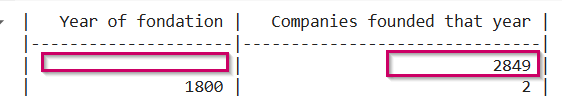
<br>
7.  Ajout d'une condition dans le `$`group.  Si l'année n'est pas renseignée, change sa valeur pour "Année non connue".  Si elle est renseignée, prend sa valeur.<br>

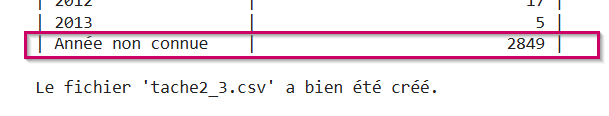

In [12]:
pipeline = [
    {
        "$group": {
            "_id": {
                "$cond": {
                    "if": {"$eq": ["$founded_year", None]},
                    "then": "Année non connue",
                    "else": "$founded_year"
                }
            },
            "count": {"$sum": 1}
        }
    },
    {
        "$sort": {
            "_id": 1  # Trier par l'année de fondation (ou "Année non connue")
        }
    },
]

resultOfPipeline = list(db.companies.aggregate(pipeline))

table_data = [
    {
        "Year of fondation": item['_id'],
        "Companies founded that year": item['count']
    }
    for item in resultOfPipeline
]
print(tabulate(table_data, headers="keys", tablefmt="github"))


# Écrire les résultats dans un fichier CSV
df = pd.DataFrame(resultOfPipeline)
csv_filename = 'tache2_3.csv'
df.to_csv(csv_filename, index=False)

# Vérifier si le fichier a bien été créé
if os.path.exists(csv_filename):
    print(f"\nLe fichier '{csv_filename}' a bien été créé.")
else:
    print(f"\nErreur : le fichier '{csv_filename}' n'a pas pu être créé.")

| Year of fondation   |   Companies founded that year |
|---------------------|-------------------------------|
| 1800                |                             2 |
| 1802                |                             1 |
| 1833                |                             1 |
| 1835                |                             1 |
| 1840                |                             2 |
| 1843                |                             1 |
| 1844                |                             1 |
| 1846                |                             1 |
| 1851                |                             1 |
| 1854                |                             2 |
| 1857                |                             1 |
| 1861                |                             1 |
| 1865                |                             2 |
| 1867                |                             1 |
| 1868                |                             1 |
| 1870                |                         

### **Étape 3 : Visualisation des données**

#### Tâche 3.1 : Graphique de la répartition des entreprises par secteur
- Utilisez un outil de visualisation tel que **Matplotlib** pour créer un graphique à barres représentant la répartition des entreprises par secteur.
- Nous allons ajouter un **widget de sélection** permettant à l'utilisateur de filtrer les données en fonction du secteur d'activité qu'il souhaite visualiser.Le widget de type "dropdown" permet à l'utilisateur de choisir un secteur d'activité.
- Le graphique à barres est mis à jour en fonction du secteur sélectionné.

# 📊 **Visualisation Matplotlib - Graphique à barres - DropDown**
1.  Reprise du code de la tâche 1.2
2.  Création d'un dropdown donnant accès aux différents secteurs d'activité listés
3.  Configuration des specs du graphique à barres dans une fonction nommée graphiqueBarres.
4.  L'instance interactive_plot fait le lien entre le widget dropdown et le graphique à barres
5.  Display affiche l'instance interactive_plot
**J'observe que l'usage combiné du dropdown et du graphique à barres donne un résultat plutôt inusité et insatisfaisant.**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

pipeline = [
    {
        "$group": {
            "_id": "$sector",
            "count": {"$sum": 1}
        }
    },
    {
        "$sort": {"count": -1}
    },
]

resultOfPipeline = list(db.inspections.aggregate(pipeline))

sector_counts = pd.DataFrame(resultOfPipeline)

sectorActivities_dropdown = widgets.Dropdown(
    options=sorted(sector_counts['_id'].unique()),
    description='Secteur activité:',
    value=sector_counts['_id'].unique()[0]  # Valeur par défaut
)

def graphiqueBarres(sectorFromDropdown):
    updated_data = sector_counts[sector_counts['_id'] == sectorFromDropdown]

    if not updated_data.empty:
        plt.figure(figsize=(10, 5))
        plt.bar(updated_data['_id'], updated_data['count'], color='purple')
        plt.title(f'Répartition des entreprises dans le secteur: {sectorFromDropdown}')
        plt.xlabel('Secteur activité')
        plt.ylabel('Nombre d\'entreprises dans ce secteur')
        plt.xticks(rotation=45)
        plt.ylim(0, sector_counts['count'].max() + 10)
        plt.show()

interactive_plot = widgets.interactive(graphiqueBarres, sectorFromDropdown=sectorActivities_dropdown)

display(interactive_plot)



interactive(children=(Dropdown(description='Secteur activité:', index=12, options=('', 'Air Condtioning Law - …

#### Tâche 3.2 : Graphique de la répartition géographique
- Créez un diagramme circulaire (pie chart) pour visualiser la répartition des entreprises par pays en affichant les 5 pays les plus représentés.
- Ajoutons un **widget multi-sélection** pour permettre à l'utilisateur de sélectionner plusieurs pays et d'afficher un diagramme circulaire (pie chart) montrant la répartition des entreprises dans ces pays. L'utilisateur peut sélectionner plusieurs pays à l'aide d'un widget "SelectMultiple".
- Le diagramme circulaire est mis à jour pour afficher la répartition des entreprises dans les pays sélectionnés.

# 🥧**Visualisation Matplotlib - Pie Chart - Widget SelectMultiple**
1.  Reprise du code de la tâche 2.1
2.  Création d'un widget SelectMultiple donnant accès aux 5 premier pays de la liste.
3.  Configuration des specs du diagramme circulaire
4.  L'instance interactive_plot fait le lien entre le widget SelectMultiple et le graphique à barres
5.  Display affiche l'instance interactive_plot


---


Plusieurs valeurs peuvent être sélectionnées simultamément en faisant [*shift* et *clic de souris"] ou encore [*clic de souris" et *flèche ⬆ ou ⬇*].

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

pipeline = [
    {
        "$unwind": "$offices"
    },
    {
        "$group": {
            "_id": {
                "company_id": "$_id",
                "country_code": "$offices.country_code"
            }
        }
    },
    {
        "$group": {
            "_id": "$_id.country_code",
            "unique_companies": {"$sum": 1}
        }
    },
    {
        "$limit": 5
    }
]

resultOfPipeline = list(db.companies.aggregate(pipeline))

pays_options = [item['_id'] for item in resultOfPipeline]


country_selector = widgets.SelectMultiple(
    options=pays_options,
    value=[pays_options[0]],
    description='Pays',
    disabled=False
)

def graphiqueDynamique(selected_pays):

    filtered_data = [item['unique_companies'] for item in resultOfPipeline if item['_id'] in selected_pays]
    filtered_pays = [item['_id'] for item in resultOfPipeline if item['_id'] in selected_pays]

    plt.figure(figsize=(10, 7))
    plt.pie(filtered_data, labels=filtered_pays, autopct='%1.1f%%')
    plt.title('Répartition des entreprises par pays sélectionnés')
    plt.show()

interactive_plot = widgets.interactive(graphiqueDynamique, selected_pays=country_selector)
display(interactive_plot)


interactive(children=(SelectMultiple(description='Pays', index=(0,), options=('BMU', 'PAN', 'BGR', 'TWN', 'HRV…

#### Tâche 3.3 : Graphique de l’évolution des entreprises par année
- Créez un graphique linéaire (line chart) montrant l’évolution du nombre d’entreprises créées chaque année.
- Ajoutons un **slider interactif** pour permettre à l'utilisateur de filtrer la plage d'années qu'il souhaite visualiser dans le graphique linéaire montrant l'évolution du nombre d'entreprises créées. Le slider permet de définir une plage d'années.
- Le graphique linéaire est mis à jour en fonction de la plage d'années sélectionnée, montrant l’évolution du nombre d’entreprises créées sur cette période.

# 📉 🎚 **Visualisation Matplotlib - Graphique Linéaire - Widget IntRangeSlider**
1.  Reprise du code de la tâche 2.3
2.  Création d'un widget IntRangeSlider afin de filtrer la plage d'années
3.  Configuration des specs du graphique linéaire
4.  L'instance interactive_plot fait le lien entre le widget IntRangeSlider et le graphique linéaire
5.  Display affiche l'instance interactive_plot


In [15]:
from datetime import date
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

pipeline = [
    {
        "$group": {
            "_id": {
                "$cond": {
                    "if": {"$eq": ["$founded_year", None]},
                    "then": "Année non connue",
                    "else": "$founded_year"
                }
            },
            "count": {"$sum": 1}
        }
    },
    {
        "$sort": {
            "_id": 1  # Trie par l'année de fondation (ou "Année non connue")
        }
    },
]

resultOfPipeline = list(db.companies.aggregate(pipeline))
df = pd.DataFrame(resultOfPipeline)

annees_options = sorted([item['_id'] for item in resultOfPipeline if isinstance(item['_id'], int)])

slider = widgets.IntRangeSlider(
    value=[annees_options[0], annees_options[-1]],
    min=annees_options[0],
    max=annees_options[-1],
    step=1,
    description='Années entre :',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def graphiqueDynamique(selected_annees):
    annee_min, annee_max = selected_annees

    # Ligne donnée par chatGpt.  Comme j'ai nommé le "champ vide" comme "Année non connue",
	  # j'avais un problème parce que certains champs étaient des champs non int
    filtered_data = df[df['_id'].apply(lambda x: isinstance(x, int) and annee_min <= x <= annee_max)]

    x = filtered_data['_id']
    y = filtered_data['count']

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', color='pink')
    plt.xlabel("Années")
    plt.ylabel("Nombre d'entreprises fondées")
    plt.title(f"Nombre d'entreprises fondées entre {annee_min} et {annee_max}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

interactive_plot = widgets.interactive(graphiqueDynamique, selected_annees=slider)
display(interactive_plot)



interactive(children=(IntRangeSlider(value=(1800, 2013), continuous_update=False, description='Années entre :'…



---



---



---



---


---


#  <center>📔 **Rapport des résultats de l'analyse. Interprétation des graphiques** 📔</center>



# 🥧**Répartition des entreprises par secteur d'activité**

Le secteur "Cigarette Retail Dealer" a le plus grand nombre d'entreprises avec 22 692 entreprises, suivi de "Grocery-Retail" avec 11 461 entreprises.
Ce tableau montre les 5 principaux secteurs ayant le plus grand nombre d'entreprises. <br>

Le retour de requête était facile à lire dans un tableau de ce type : <br>
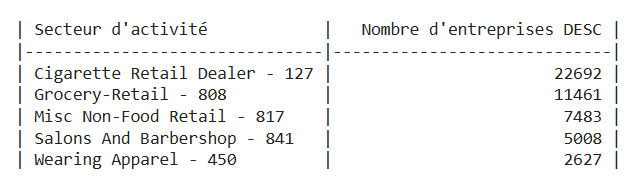 <br>
Mais ils l'étaient moins dans un graphique à barres.  Je crois que l'usage du graphique à barre seul aurait été plus représentatif de l'ensemble des résultats.  Mais J'observe que l'usage combiné du dropdown et du graphique à barres donne un résultat plutôt inusité et insatisfaisant.  Le dropdown nous force à choisir une seule compagnie à la fois, ce qui inhibe l'opportunité de comparer les entreprises entre elles. <br>
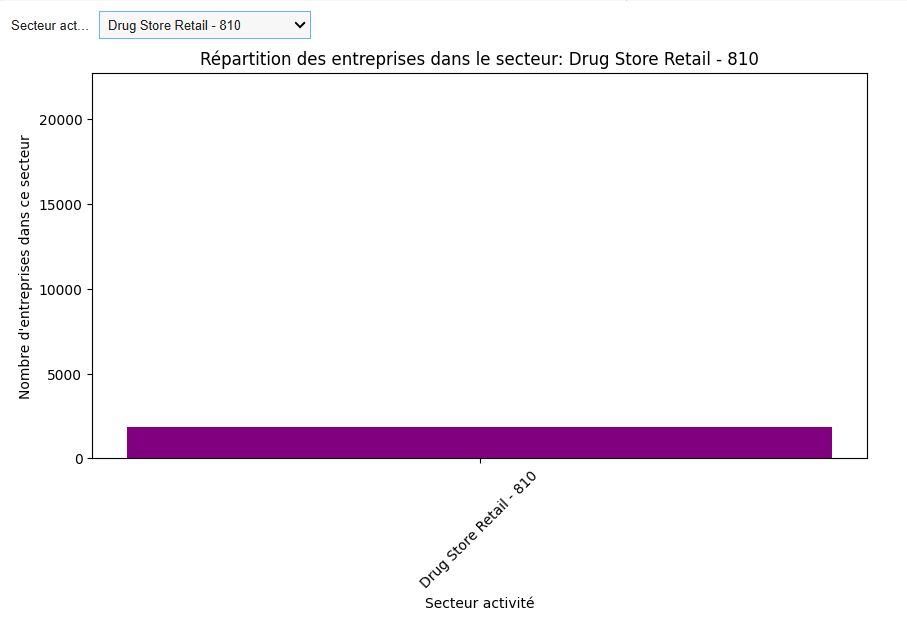 <br>


---


# 🌎**Répartition des entreprises par pays**
Le retour de requête de cette tâche fournit un tableau peu représentatif et difficile à analyser puisqu'il n'est pas trié et que le nombre de données en sortie est élevé.  On ne peut rien conclure de son obervation <br>
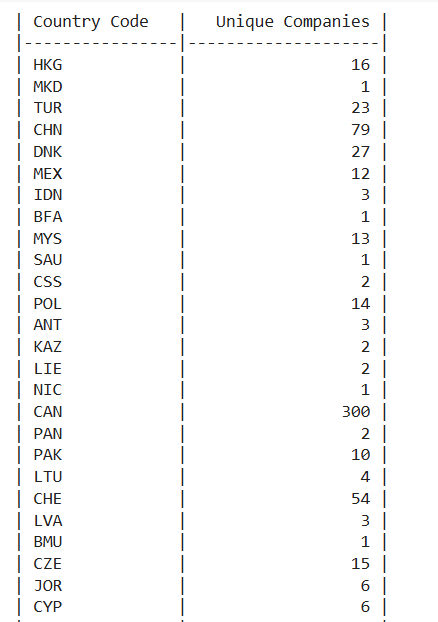 <br>
Cependant, lorsque l'on passe les données dans un graphique pie chart, on distingue immédiatement où sont située la majorité des entreprises.  Cette recherche était limitée aux 5 premiers pays, mais il aurait été possible de donner plus de choix à l'utilisateur. <br>
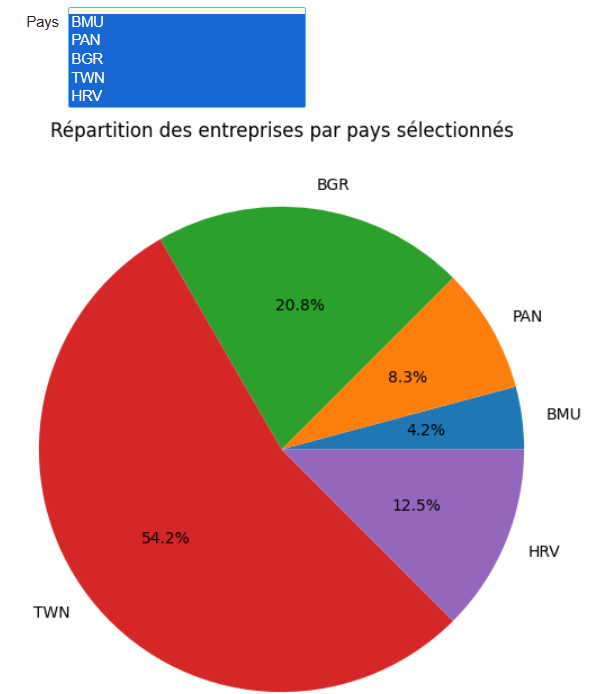 <br>


---

# 🕔 **Analyse temporelle de l'évolution de la création d'entreprises**
Le retour de requête affiche un tableau ordonné par année ainsi que le nombre d'entreprises ayant été fondée durant cette période.  Étant donné la grande quantité d'enregistrement, il est impossible d'avoir une vue d'ensemble sur les résultats de cette requête, le tableau étant trop long à parcourir. <br>
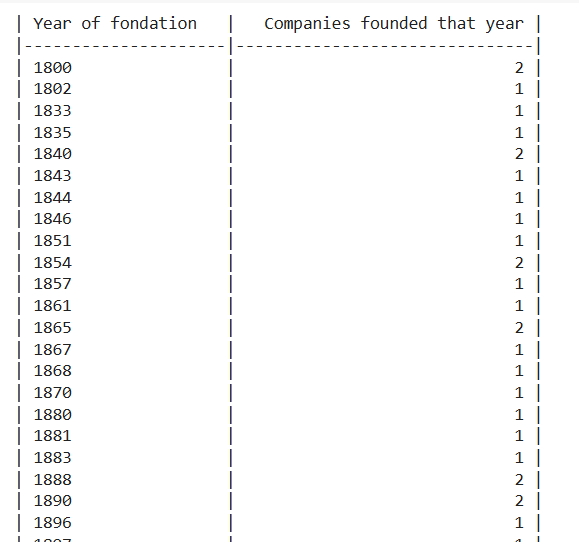 <br>
Cependant, à l'aide d'un diagramme linéaire et d'un slider permettant de choisir une plage d'années, les données sont désormais plus précises et crédibles.  On peut facilement observer, par exemple, que la première vague de lancement d'entreprise s'est fait lors des deux Grandes Guerres mondiales. <br>
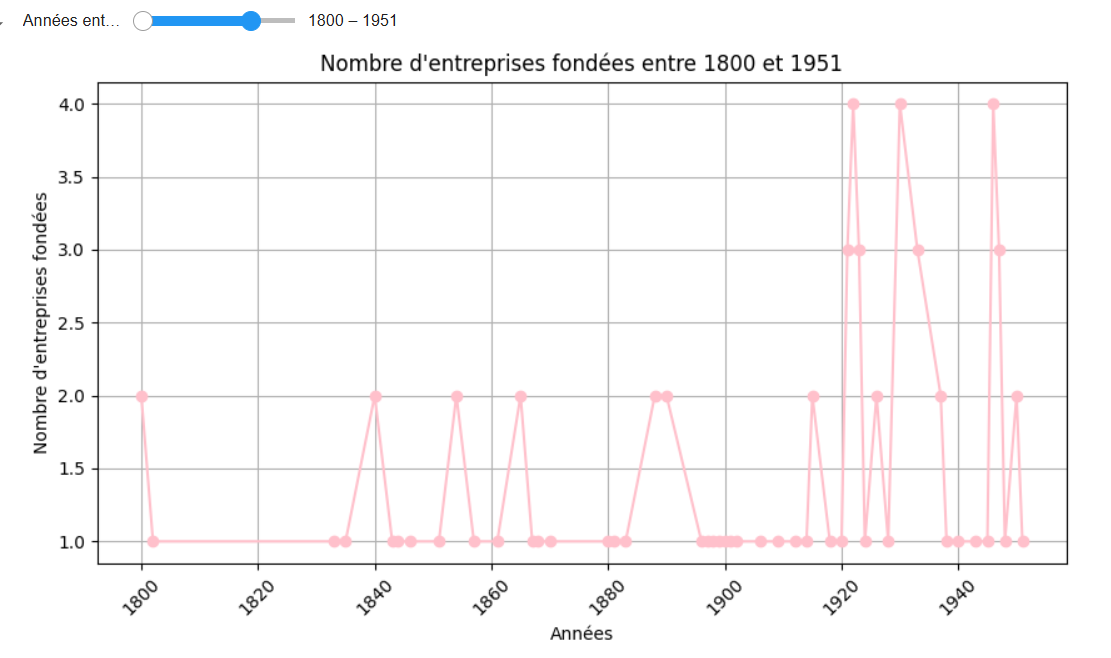



---



---



---



---


---

### **Livrables** :
1. Code source des requêtes MongoDB utilisées pour l'extraction et la transformation des données dans un fichier zip incluant : notebook Num-DA_TP2_420-514.ipynb, les fichiers csv créés.
2. Les graphiques générés pour visualiser les résultats des analyses.
3. Un rapport expliquant les résultats de l'analyse, incluant une interprétation des graphiques.

---

### **Évaluation** :
Le TP sera noté sur la base des critères suivants :
- Capacité à extraire les bonnes données de MongoDB (30%).
- Capacité à transformer et structurer les données pour obtenir des insights pertinents (30%).
- Qualité des visualisations et interprétation des résultats (30%).
- Clarté et présentation du rapport final (10%).

---

### **Instructions supplémentaires** :
- Vous pouvez utiliser PyMongo pour interagir avec MongoDB à partir de Python.
- Les visualisations doivent être produites avec **Matplotlib**, **Widgets** et **interact** en Python.
- Le respect des bonnes pratiques de nommage et de documentation de votre code sera pris en compte.

---

### **Ressources** :
- [Documentation MongoDB](https://docs.mongodb.com/manual/)
- [PyMongo - MongoDB pour Python](https://pymongo.readthedocs.io/en/stable/)
- [Matplotlib](https://matplotlib.org/stable/users/index.html)
- [ineteract](https://ipywidgets.readthedocs.io/en/8.1.5/examples/Using%20Interact.html)
- [Widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)